In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### LU factorization and Pivoted LU factorization

In [2]:
def lu_overwrite(At):
    """
    Performs Gaussian elimination without any pivoting
    Overwrites the entries of A with L and U
    
    Use scipy.linalg.lu_factor in practice!
    
    """
    
    A = np.copy(At)
    
    n = A.shape[0]
    for k in range(n-1):
        # Check if the pivot is tiny, and break if it is
        assert(np.abs(A[k,k]) > 10**(-16) )
        
        # Compute L factor (L_{i,k} = a_{ik}/a_{kk})
        A[k+1:n,k] /= A[k,k]
        
        # Update U factor in place. This combines two different steps
        # copying a row of U. Updating \tilde{A}_{22}
        A[k+1:n,k+1:n] -= np.outer(A[k+1:n,k], A[k, k+1:n])
        
    return A

def test_lu_overwrite(n = 3):
    At = np.random.randn(n,n)
    print('A is \n', At)
    
    A = lu_overwrite(At)
    
    #Extract L
    L = np.tril(A,-1) + np.eye(A.shape[0])
    print('L is \n', L)
    
    U = np.triu(A)
    print('U is \n', U)
    
    print('L * U is \n', L @ U)
    
    
    print('')
    print('Other statistics')
    print('')
    
    print('Relative error is ', np.linalg.norm(At - L@U)/np.linalg.norm(At))
    print('\|L\|_\infty is ', np.linalg.norm(L, np.inf))
    print('\|U\|_\infty is ', np.linalg.norm(U, np.inf))
   
    
    return
test_lu_overwrite(4)

A is 
 [[ 0.49647589  0.27283796 -0.48524756  0.63451585]
 [ 1.06258711 -0.06409212  1.94856162  2.1951328 ]
 [-0.97964329  1.06853177  0.51300359 -0.58631535]
 [ 0.88031483  0.70104784 -0.80081056  0.08416447]]
L is 
 [[ 1.          0.          0.          0.        ]
 [ 2.14025925  1.          0.          0.        ]
 [-1.97319409 -2.47963667  1.          0.        ]
 [ 1.77312706 -0.33527683  0.15240346  1.        ]]
U is 
 [[ 0.49647589  0.27283796 -0.48524756  0.63451585]
 [ 0.         -0.64803607  2.98711721  0.83710437]
 [ 0.          0.          6.96248132  2.74142229]
 [ 0.          0.          0.         -1.17805328]]
L * U is 
 [[ 0.49647589  0.27283796 -0.48524756  0.63451585]
 [ 1.06258711 -0.06409212  1.94856162  2.1951328 ]
 [-0.97964329  1.06853177  0.51300359 -0.58631535]
 [ 0.88031483  0.70104784 -0.80081056  0.08416447]]

Other statistics

Relative error is  1.0615306546383086e-16
\|L\|_\infty is  5.452830759101631
\|U\|_\infty is  9.703903609795905


### Gaussian Elimination with partial pivoting

In [3]:
def plu_overwrite(At):
    """
    Performs Gaussian elimination with partial pivoting
    Overwrites the entries of A with L and U
    
    Use scipy.linalg.lu_factor in practice!
    
    """
    
    A = np.copy(At)
    n = A.shape[0]
    
    #Store permutations
    p = np.arange(n)
    
    for k in range(n-1):
        #Determine pivot by looking at k^th column
        mu = k + np.argmax(np.abs(A[k:,k]))
         
        #Swap rows based on the pivot
        p[k], p[mu] = p[mu], p[k]  ## Row swaps in the permutation matrix
        A[[k,mu],:] = A[[mu,k],:]  ## Row swaps in both L and U
        
        assert(np.abs(A[k,k]) > 10**(-16) )
        
        # Computing the L factor
        A[k+1:n,k] /= A[k,k]
        
        # Updating the U factor and the A_22 factor
        # In practice, this would be a double for loop 
        A[k+1:n,k+1:n] -= np.outer(A[k+1:n,k], A[k, k+1:n])
        
        
    return A, p

In [4]:
def test_plu(n):
    At = np.random.randn(n,n)
    print('Original A is \n', At)
    
    A, p = plu_overwrite(At)
    
    #Extract L and U
    L = np.tril(A,-1) + np.eye(A.shape[0])
    U = np.triu(A)

    
    #Compute PA
    PA = At[p,:]
    print('')
    print('P * A is \n', PA)
    print('')
    print('L *U is \n', L @ U)
    
    print('')
    print('Other statistics')
    print('')
    
    print('Relative error is ', np.linalg.norm(PA - L@U)/np.linalg.norm(PA))
    print('\|L\|_\infty is ', np.linalg.norm(L, np.inf))
    print('\|U\|_\infty is ', np.linalg.norm(U, np.inf))
    
    
    return
test_plu(5)

Original A is 
 [[-0.1319225  -0.59405486 -1.31945513  0.39254509  1.71284026]
 [ 0.35237369  0.50347504  0.12012733 -0.55725229  1.63797659]
 [ 1.74666079 -1.06731482  0.54090972 -0.62397699  1.29837884]
 [-0.10993593 -2.04981121  1.63364009 -0.4082458  -0.23499277]
 [-0.76644498  0.85641425 -1.64048986  1.92765741 -0.1947538 ]]

P * A is 
 [[ 1.74666079 -1.06731482  0.54090972 -0.62397699  1.29837884]
 [-0.10993593 -2.04981121  1.63364009 -0.4082458  -0.23499277]
 [-0.1319225  -0.59405486 -1.31945513  0.39254509  1.71284026]
 [-0.76644498  0.85641425 -1.64048986  1.92765741 -0.1947538 ]
 [ 0.35237369  0.50347504  0.12012733 -0.55725229  1.63797659]]

L *U is 
 [[ 1.74666079 -1.06731482  0.54090972 -0.62397699  1.29837884]
 [-0.10993593 -2.04981121  1.63364009 -0.4082458  -0.23499277]
 [-0.1319225  -0.59405486 -1.31945513  0.39254509  1.71284026]
 [-0.76644498  0.85641425 -1.64048986  1.92765741 -0.1947538 ]
 [ 0.35237369  0.50347504  0.12012733 -0.55725229  1.63797659]]

Other statis

### Timing

To show timing results, I will use the standard libraries which have much better implementations.

In [5]:
import scipy.linalg as sl
import time 

nlst = np.arange(100,4000,500)

fact_time = np.zeros((nlst.size,))
solv_time = np.zeros((nlst.size,))

# Number of runs over which to average
nruns = 3
for j, n in enumerate(nlst):
    A = np.random.randn(n,n)
    b = np.random.randn(n)
    for k in range(nruns):
        # Compute factorize time
        temp = time.time()
        lu, piv = sl.lu_factor(A)
        fact_time[j] += time.time() - temp
        
        
        #Compute solve time
        temp = time.time()
        x = sl.solve_triangular(lu,b) # solves upper triangular part
        solv_time[j] += time.time() - temp
        
fact_time /= nruns
solv_time /= nruns

Text(0.5, 0, 'Matrix size n')

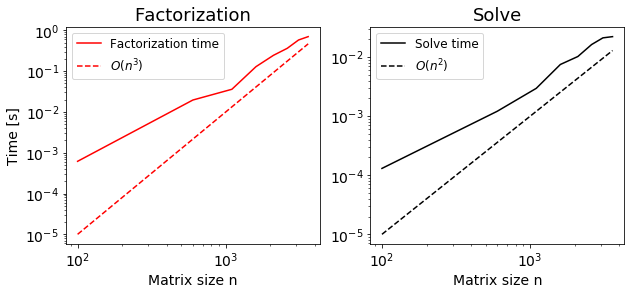

In [6]:
f, (ax1, ax2 ) = plt.subplots(1,2, figsize = (10,4))
ax1.loglog(nlst, fact_time, 'r-', nlst, 10**(-11)*nlst**3, 'r--')
ax1.legend(('Factorization time', '$O(n^3)$'), fontsize = 12)
ax1.set_title('Factorization', fontsize = 18)
ax1.set_xlabel('Matrix size n', fontsize = 14)
ax1.set_ylabel('Time [s]', fontsize = 14)

ax2.loglog(nlst, solv_time, 'k-', nlst, 10**(-9)*nlst**2, 'k--')
ax2.legend(('Solve time', '$O(n^2)$'), fontsize = 12)
ax2.set_title('Solve', fontsize = 18)
ax2.set_xlabel('Matrix size n', fontsize = 14)

**Bottom line**: factorization is a lot faster than inverting. This is one of the reasons, you should not compute the inverse. Almost anything you can do with the inverse, you can do with the factorization!

### Growth factors and backwards stability

The growth factor in Gaussian elimination is 
$$ g_{PP} = \frac{\|U\|_{\max}}{\| A \|_{\max}} = \frac{\max_{ij} |u_{ij}|}{\max_{ij} |a_{ij}|}.$$

We will plot the "distribution" of growth factors for random matrices of various sizes.

Text(0.5, 0.98, 'Histogram of Growth Factor')

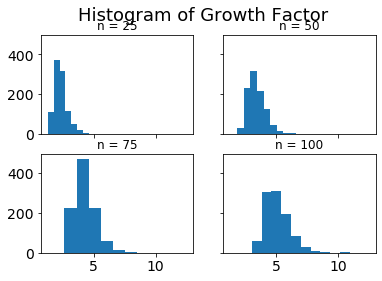

In [7]:
nlst = [25, 50, 75, 100]

import scipy.linalg as sl
growth = np.zeros((1000,len(nlst)))

for j, n in enumerate(nlst):
    for k in range(1000):
        A = np.random.randn(n,n)
        p, l, u = sl.lu(A)
        growth[k,j] = np.linalg.norm(u.ravel(), np.inf)/np.linalg.norm(A.ravel(), np.inf)


# Plot growth factors
f, axarray = plt.subplots(2,2, sharex = True, sharey = True)
for j, ax in enumerate(axarray.flatten()):
    ax.hist(growth[:,j])
    ax.set_title('n = %g' % (nlst[j]))   
    
f.suptitle('Histogram of Growth Factor', fontsize = 18)

This next plot shows that the growth factor for random matrices is $g_{PP} \sim \sqrt{n}$.

Text(0.5, 1.0, 'Growth of growth factor')

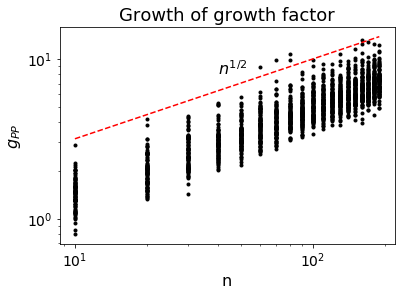

In [8]:
nlst = np.arange(10,200,10)

growth = np.zeros((100,len(nlst)))


for j, n in enumerate(nlst):
    for k in range(100):
        A = np.random.randn(n,n)
        p, l, u = sl.lu(A)
        growth[k,j] = np.linalg.norm(u.ravel(), np.inf)/np.linalg.norm(A.ravel(), np.inf)
    
    plt.loglog(n*np.ones((100,)),growth[:,j],'k.')
    
plt.loglog(nlst,np.sqrt(nlst), 'r--')
plt.xlabel('n', fontsize = 16)
plt.ylabel('$g_{PP}$', fontsize = 16)
plt.text(40, 8, '$n^{1/2}$', fontdict={'fontsize':16})
plt.title('Growth of growth factor', fontsize = 18)

### More on forward and backward stability

In [9]:
import scipy.linalg as sl
import time 

In [10]:
def evilmatrix(n):
    
    L = np.tril(-np.ones((n,n)), -1) + np.eye(n)
    U = np.eye(n)
    U[:,-1] = 2**np.arange(n)
    
    A = np.tril(-np.ones((n,n)), -1) + np.eye(n)
    A[:,-1] = np.ones((n,))
    
    return L, U, A

In [11]:
L, U, A = evilmatrix(5)
print('L is \n')
print(L)
print('U is \n')
print(U)
print('A is \n')
print(A)

L is 

[[ 1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1. -1.  1.  0.]
 [-1. -1. -1. -1.  1.]]
U is 

[[ 1.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  2.]
 [ 0.  0.  1.  0.  4.]
 [ 0.  0.  0.  1.  8.]
 [ 0.  0.  0.  0. 16.]]
A is 

[[ 1.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  1.]
 [-1. -1.  1.  0.  1.]
 [-1. -1. -1.  1.  1.]
 [-1. -1. -1. -1.  1.]]


#### LU factorization on the "evil matrix"

In [12]:
nlst = np.arange(2,100,2)

errr = np.zeros((nlst.size,))
errs = np.zeros((nlst.size,))



growth = np.zeros((nlst.size,))
cond   = np.zeros((nlst.size))

for j,n in enumerate(nlst):
    
    x = np.ones((n,), dtype = 'b')
    L,U,A = evilmatrix(n)
  
    growth[j] = np.linalg.norm(U, np.inf)/np.linalg.norm(A, np.inf)
    
    b = A @ x
    xa = sl.solve(A, b)
    
    #forward ||x-xhat||/||x||
    errs[j] = np.linalg.norm(xa-x)/np.linalg.norm(x)
    #residual ||r||/ ||b||   r= Axhat - b
    errr[j] = np.linalg.norm(A@xa - b)/np.linalg.norm(b)
    
    cond[j] = np.linalg.cond(A)

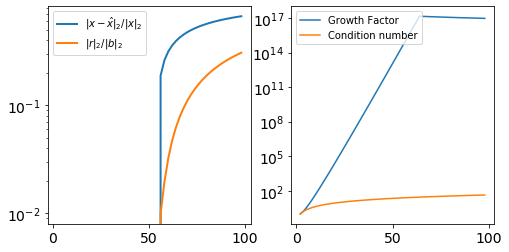

In [13]:
f, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))

ax1.semilogy(nlst, errs, nlst, errr, lw = 2)
ax1.legend(('$\|x-\hat{x}\|_2/ \|x\|_2$', '$\|r\|_2/\|b\|_2$'), loc = 'upper left')

ax2.semilogy(nlst, growth, nlst, cond)
ax2.legend(('Growth Factor', 'Condition number'), loc = 'upper left')

#### LU factorization on the Hilbert matrix

The Hilbert matrix has entries 
$$ H_{ij} = \frac{1}{i+j-1} \qquad i,j = 1,\dots,n$$
is known to be ill-conditioned and its inverse has integer entries.

/Users/arvindks/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=2.34967e-17): result may not be accurate.
/Users/arvindks/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=1.01671e-18): result may not be accurate.
/Users/arvindks/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=1.1839e-19): result may not be accurate.
/Users/arvindks/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=4.28875e-19): result may not be accurate.
/Users/arvindks/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=1.42901e-19): result may not be accurate.
/Users/arvindks/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:30: LinAlgWarning: Ill-conditi

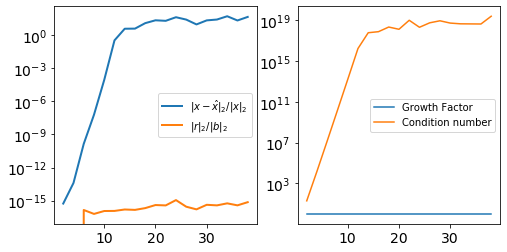

In [14]:
def hilbert(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = 1/(i+j+1)
            
    return A

nlst = np.arange(2,40,2)

errr = np.zeros((nlst.size,))
errs = np.zeros((nlst.size,))



growth = np.zeros((nlst.size,))
cond   = np.zeros((nlst.size))


for j,n in enumerate(nlst):
    
    x = np.ones((n,), dtype = 'b')
    A = hilbert(n)
      
    P,L,U = sl.lu(A,permute_l=False)

    growth[j] = np.linalg.norm(U, np.inf)/np.linalg.norm(A, np.inf)
    
    b = A @ x
    xa = sl.solve(A, b)
    
    errs[j] = np.linalg.norm(xa-x)/np.linalg.norm(x)
    errr[j] = np.linalg.norm(A@xa - b)/np.linalg.norm(b)
    
    cond[j] = np.linalg.cond(A)
    
f, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))

ax1.semilogy(nlst, errs, nlst, errr, lw = 2)
ax1.legend(('$\|x-\hat{x}\|_2/ \|x\|_2$', '$\|r\|_2/\|b\|_2$'), loc = 'right')

ax2.semilogy(nlst, growth, nlst, cond)
ax2.legend(('Growth Factor', 'Condition number'), loc = 'right')

In [15]:
print(growth)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
